In [25]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from src.default_paths import path_root
from src.mappings import model_names, task_names
from src.utils import list_dir

In [43]:
PATH_RESULTS = os.path.join(path_root, "results/raw")
df_adapters = pd.read_csv(os.path.join(PATH_RESULTS, "adapter_models/results.csv"))
df_adapters_fs = pd.read_csv(os.path.join(PATH_RESULTS, "adapter_models_few_shots/results.csv"))

In [44]:
models = ["GBM [No Expansion]", "CLMBR", "CLMBR_PAPT", "CLMBR_CAPT", "CLMBR_SK"]

tasks = [
    "In-hospital Mortality", "Long LOS", "30-day Readmission", 
    "Hypoglycemia", "Hyponatremia", "Hyperkalemia", "Thrombocytopenia", "Anemia"
]

In [45]:
df_adapters = df_adapters.replace({**model_names, **task_names}).query("model==@models and task==@tasks")
df_adapters_fs = df_adapters_fs.replace({**model_names, **task_names}).query("model==@models and task==@tasks")

In [46]:
df_adapters_fs = df_adapters_fs.sort_values(["model","n_shots"])

In [47]:
df_adapters_fs["n_shots"] = df_adapters_fs["n_shots"].astype(str)

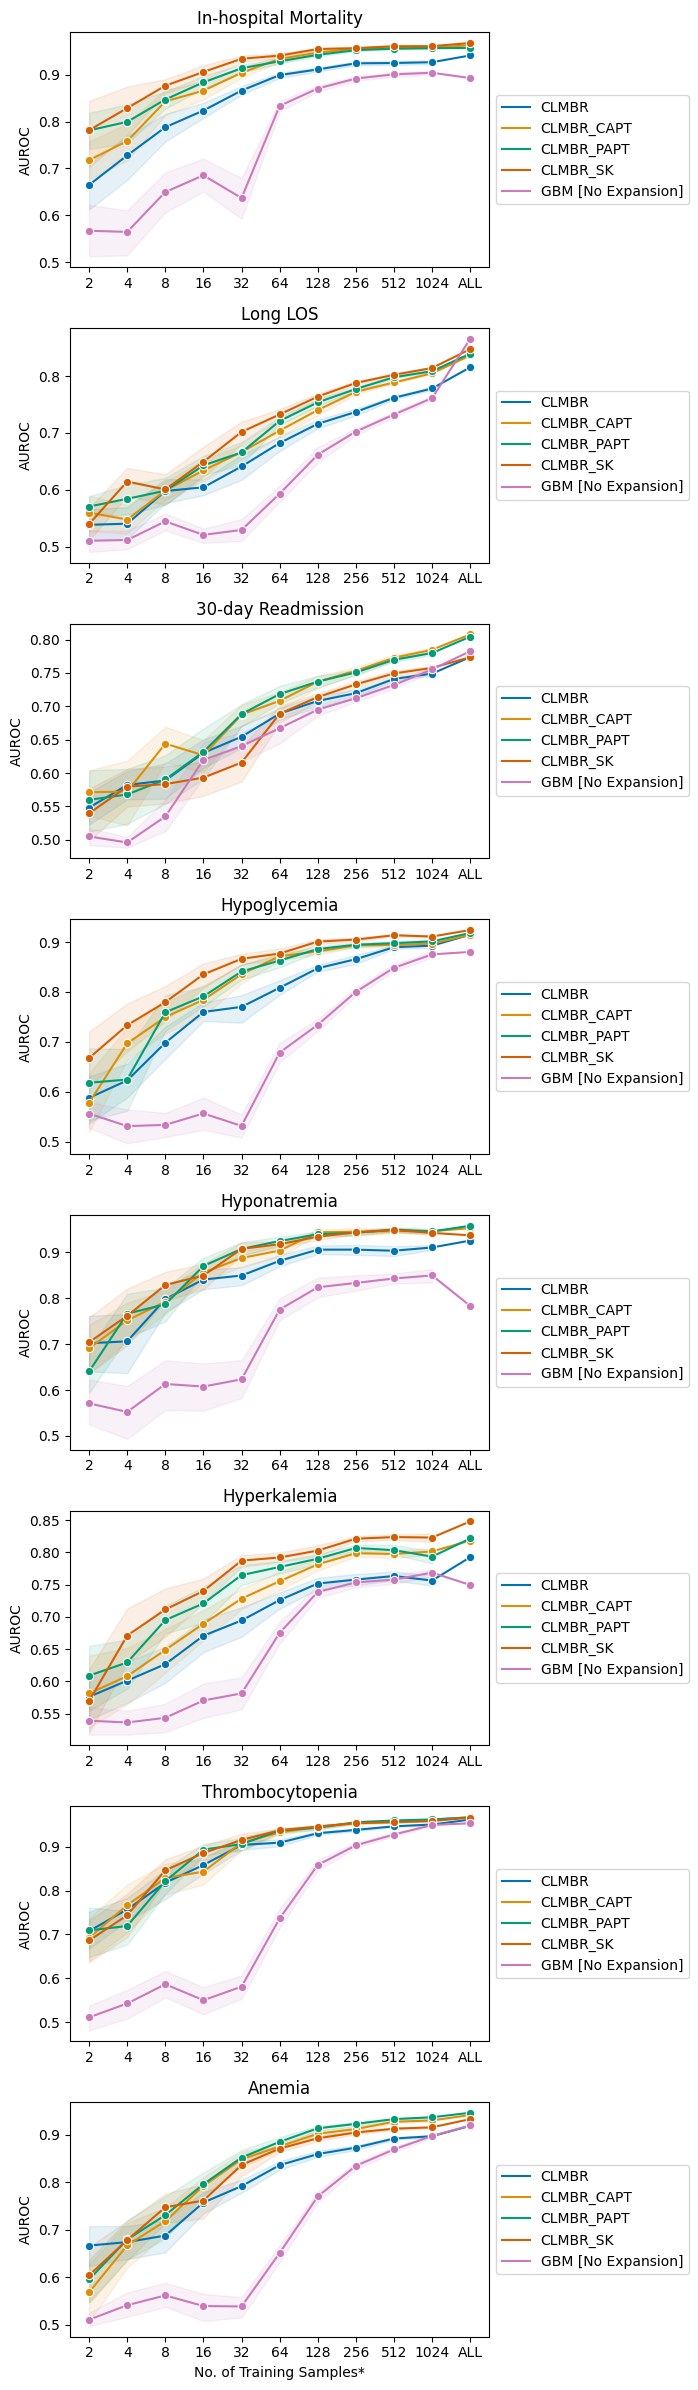

In [59]:
fig, axes = plt.subplots(nrows=len(tasks), ncols=1, figsize=(7,3*len(tasks)))

for r, task in enumerate(tasks):
    data = pd.concat((
        df_adapters_fs.query("task==@task"),
        df_adapters.query("task==@task").assign(n_shots="ALL", iteration=0)
    ))
    
    sns.lineplot(
        data=data,
        x="n_shots",
        y="auroc",
        hue="model",
        marker="o",
        ax=axes[r],
        palette="colorblind",
        errorbar="ci",
        err_kws={"alpha":0.1},
    )

    axes[r].legend(loc='center left', bbox_to_anchor=(1,0.5))
    axes[r].set_title(task)
    axes[r].set_ylabel("AUROC")

    if r==len(tasks)-1:
        axes[r].set_xlabel("No. of Training Samples*")
    else:
        axes[r].set_xlabel("")

plt.tight_layout()
plt.savefig(os.path.join(path_root,"results/main.png"), dpi=300, bbox_inches='tight', pad_inches=1)
plt.show()